# Linear Regression model for prediction salary

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load dataset

In [3]:
df = pd.read_csv('Salary_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Data exploration

In [5]:
df.shape

(30, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [7]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [8]:
df.drop(columns='Unnamed: 0', inplace=True)

In [9]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

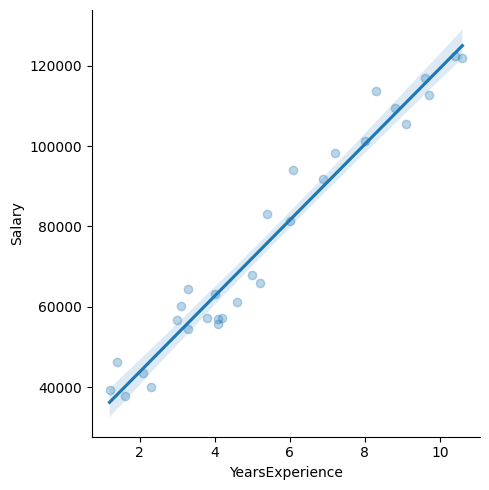

In [10]:
sns.lmplot(x='YearsExperience', y='Salary', data=df,
          scatter_kws={'alpha':0.3})
plt.show()

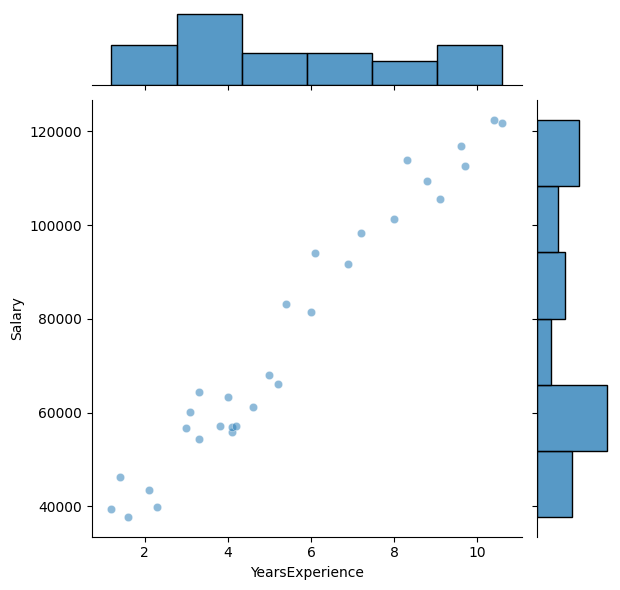

In [11]:
sns.jointplot(x='YearsExperience', y='Salary', data=df, alpha=0.5)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

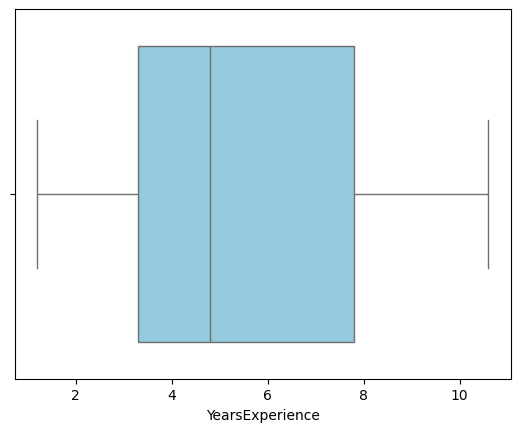

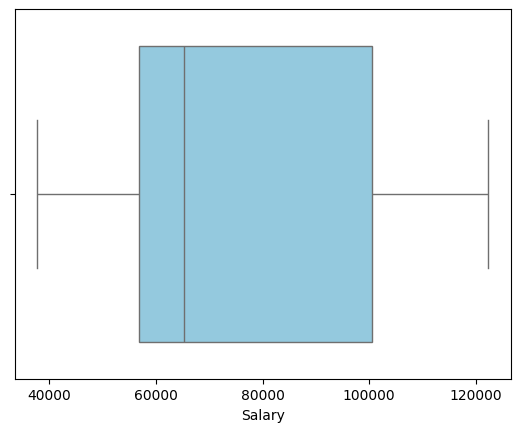

In [14]:
for i in df.columns:
    sns.boxplot(df[i], orient='h', color='skyblue')
    plt.show()

In [15]:
# X and y
x = df['YearsExperience']
y = df['Salary']

In [16]:
# Numpy data
x = x.to_numpy()
y = y.to_numpy()

In [17]:
x = x.reshape(-1, 1)

In [18]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

In [19]:
x_train.shape

(24, 1)

In [20]:
x_train.ndim

2

In [21]:
y_train.shape

(24,)

In [22]:
y_train.ndim

1

In [23]:
# Normalization
scaler = StandardScaler()  
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)

In [24]:
# Create model
model = LinearRegression()

# Train
model.fit(x_train, y_train)

LinearRegression()

In [25]:
# Test model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mse)}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 35246857.24987445
Root Mean Squared Error (RMSE): 5936.906370313957
R^2 Score: 0.9140067830429537


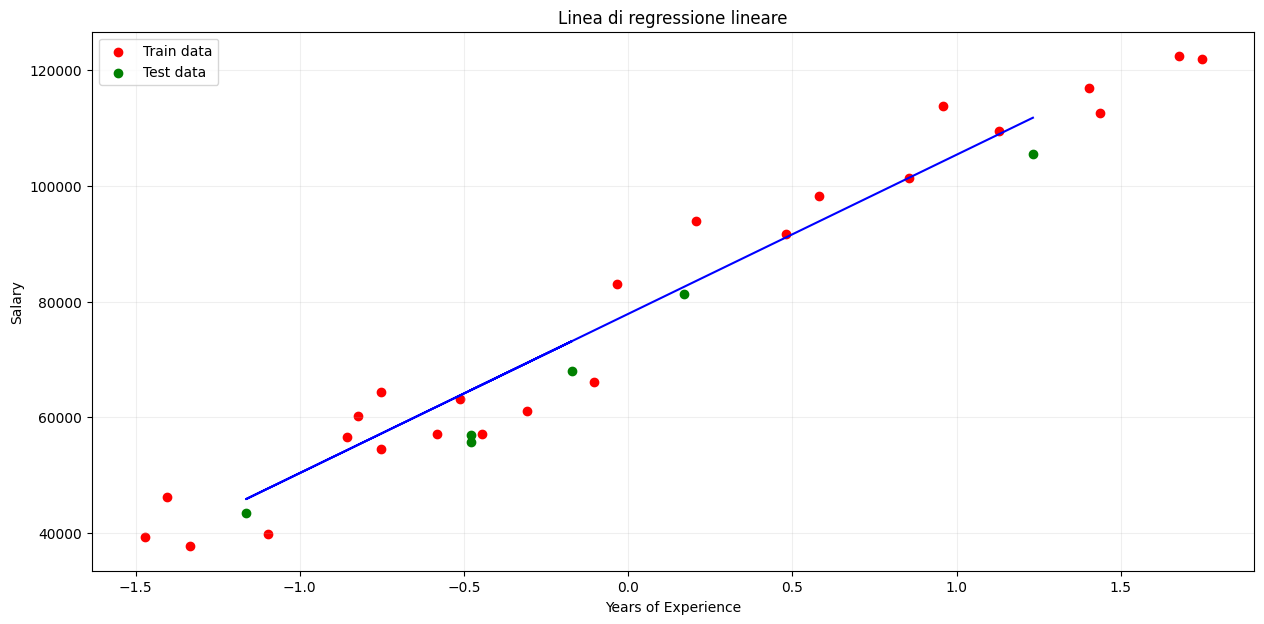

In [26]:
plt.figure(figsize=(15, 7))
plt.scatter(x_train, y_train, color='red', label="Train data")  
plt.scatter(x_test, y_test, color='green', label='Test data')  
plt.plot(x_test, y_pred, color='blue')  
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linea di regressione lineare')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

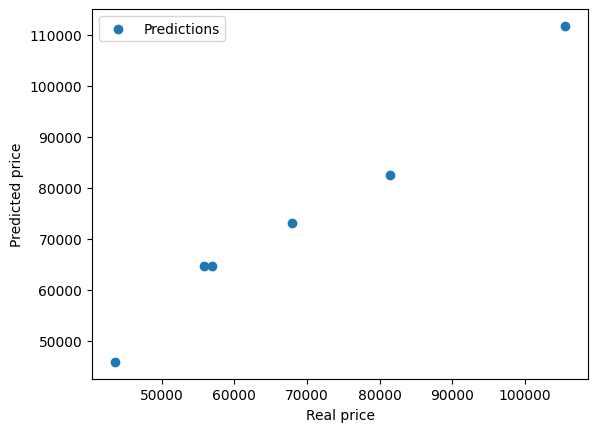

In [27]:
plt.scatter(y_test, y_pred, label='Predictions')
plt.xlabel('Real price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()